In [125]:
%matplotlib notebook
import h5py
from torch.autograd import Variable
import torch.nn as nn
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data as data
import torchvision.models as models
import torch.nn.functional as F
import torch.nn.init as init
from torch.nn.utils.rnn import pack_padded_sequence
import torchvision.transforms as transforms
import os
import sys
import os.path
import math
import re
import torch
from PIL import Image
from tqdm import tqdm
from collections import Counter
import itertools
import json
from matplotlib import pyplot as plt
preprocessed_path = '/datasets/home/17/717/yuz310/pre/resnet-14x14.h5'
vocabulary_path='/datasets/home/17/717/yuz310/pre/voca_v1.json'
train_questions = '/datasets/ee285f-public/VQA2017/v2_OpenEnded_mscoco_train2014_questions.json'
train_answers = '/datasets/ee285f-public/VQA2017/v2_mscoco_train2014_annotations.json'
train_image_path = "/datasets/ee285f-public/VQA2017/train2014/"
val_image_path = "/datasets/ee285f-public/VQA2017/val2014/"
max_answers = 3000
output_features=2048
image_size = 448  
output_size = image_size // 32  

In [127]:
def plot(history, fig, axes):
    axes[0].clear()
    axes[1].clear()
    l = 10
    axes[0].plot([history[k][0]['loss'] for k in range(l)],
                label="training loss")
    axes[0].plot([history[k][1]['loss'] for k in range(l)],
                label="evaluation loss")
    axes[1].plot([history[k][0]['accuracy'] for k in range(l)],
                label="training accuracy")
    axes[1].plot([history[k][1]['accuracy'] for k in range(l)],
                label="evaluation accuracy")
    axes[0].legend()
    axes[1].legend()
    plt.tight_layout()
    fig.canvas.draw()

## Model with pretrained embedding layer on VQA V1 dataset

In [3]:
VQA_V1_EMB = 'VQA1_EMB'
checkpoint_path = os.path.join(VQA_V1_EMB, "checkpoint.pth.tar")
checkpoint = torch.load(checkpoint_path)
history = checkpoint['History']

<IPython.core.display.Javascript object>


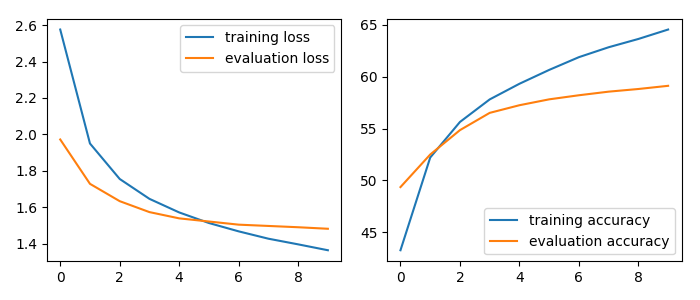

Epoch 14 Train loss 1.2590 Train accuracy 67.7273
Epoch 14 Validation loss 1.4729 Validation accuracy 60.0298
Epoch 10 Train loss 1.3414 Train accuracy 65.2976
Epoch 10 Validation loss 1.4797 Validation accuracy 59.3345


In [4]:
fig, axes = plt.subplots(ncols=2, figsize=(7, 3))
plot(history, fig, axes)
print("Epoch",len(history)-1,"Train loss","%.04f"%history[-1][0]['loss'], "Train accuracy","%.04f"%history[-1][0]['accuracy'].item())
print("Epoch",len(history)-1,"Validation loss","%.04f"%history[-1][1]['loss'], "Validation accuracy","%.04f"%history[-1][1]['accuracy'].item())
print("Epoch",10,"Train loss","%.04f"%history[10][0]['loss'], "Train accuracy","%.04f"%history[10][0]['accuracy'].item())
print("Epoch",10,"Validation loss","%.04f"%history[10][1]['loss'], "Validation accuracy","%.04f"%history[10][1]['accuracy'].item())

## Model with pretrained embedding layer on VQA V2 dataset

In [22]:
VQA_V2_EMB = 'VQA2_EMB'
checkpoint_path = os.path.join(VQA_V2_EMB, "checkpoint.pth.tar")
checkpoint = torch.load(checkpoint_path)
history = checkpoint['History']

<IPython.core.display.Javascript object>


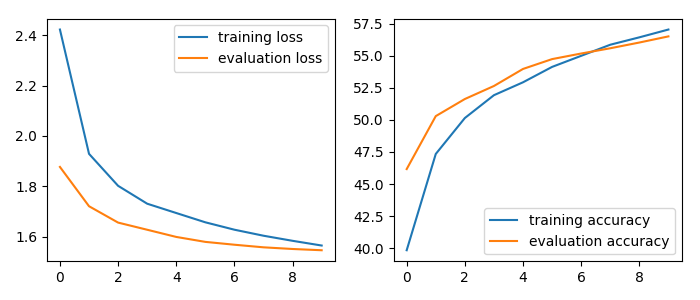

Epoch 15 Train loss 1.4809 Train accuracy 59.9179
Epoch 15 Validation loss 1.5210 Validation accuracy 57.4982
Epoch 10 Train loss 1.5492 Train accuracy 57.6504
Epoch 10 Validation loss 1.5410 Validation accuracy 56.6897


In [23]:
fig, axes = plt.subplots(ncols=2, figsize=(7, 3))
plot(history, fig, axes)
print("Epoch",len(history)-1,"Train loss","%.04f"%history[-1][0]['loss'], "Train accuracy","%.04f"%history[-1][0]['accuracy'].item())
print("Epoch",len(history)-1,"Validation loss","%.04f"%history[-1][1]['loss'], "Validation accuracy","%.04f"%history[-1][1]['accuracy'].item())
print("Epoch",10,"Train loss","%.04f"%history[10][0]['loss'], "Train accuracy","%.04f"%history[10][0]['accuracy'].item())
print("Epoch",10,"Validation loss","%.04f"%history[10][1]['loss'], "Validation accuracy","%.04f"%history[10][1]['accuracy'].item())

## Model with pretrained embedding layer and LSTM replaced with GRU on VQA V2 dataset

In [24]:
VQA_V2_GRU = 'VQA2_GRU'
checkpoint_path = os.path.join(VQA_V2_GRU, "checkpoint.pth.tar")
checkpoint = torch.load(checkpoint_path)
history = checkpoint['History']

<IPython.core.display.Javascript object>


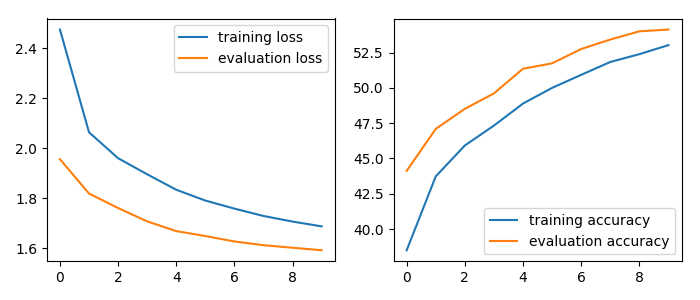

Epoch 10 Train loss 1.6699 Train accuracy 53.6581
Epoch 10 Validation loss 1.5839 Validation accuracy 54.8045
Epoch 10 Train loss 1.6699 Train accuracy 53.6581
Epoch 10 Validation loss 1.5839 Validation accuracy 54.8045


In [25]:
fig, axes = plt.subplots(ncols=2, figsize=(7, 3))
plot(history, fig, axes)
print("Epoch",len(history)-1,"Train loss","%.04f"%history[-1][0]['loss'], "Train accuracy","%.04f"%history[-1][0]['accuracy'].item())
print("Epoch",len(history)-1,"Validation loss","%.04f"%history[-1][1]['loss'], "Validation accuracy","%.04f"%history[-1][1]['accuracy'].item())
print("Epoch",10,"Train loss","%.04f"%history[10][0]['loss'], "Train accuracy","%.04f"%history[10][0]['accuracy'].item())
print("Epoch",10,"Validation loss","%.04f"%history[10][1]['loss'], "Validation accuracy","%.04f"%history[10][1]['accuracy'].item())

In [123]:
VQA_V1_CONV = 'VQA2_CONV'
checkpoint_path = os.path.join(VQA_V1_CONV, "checkpoint.pth.tar")
checkpoint = torch.load(checkpoint_path)
history = checkpoint['History']

<IPython.core.display.Javascript object>


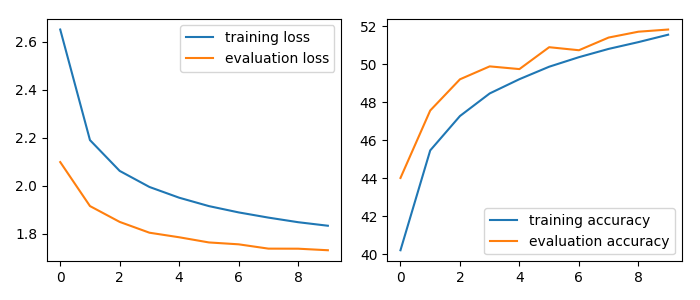

Epoch 10 Train loss 1.8185 Train accuracy 51.7611
Epoch 10 Validation loss 1.7252 Validation accuracy 52.0770
Epoch 10 Train loss 1.8185 Train accuracy 51.7611
Epoch 10 Validation loss 1.7252 Validation accuracy 52.0770


In [128]:
fig, axes = plt.subplots(ncols=2, figsize=(7, 3))
plot(history, fig, axes)
print("Epoch",len(history)-1,"Train loss","%.04f"%history[-1][0]['loss'], "Train accuracy","%.04f"%history[-1][0]['accuracy'].item())
print("Epoch",len(history)-1,"Validation loss","%.04f"%history[-1][1]['loss'], "Validation accuracy","%.04f"%history[-1][1]['accuracy'].item())
print("Epoch",10,"Train loss","%.04f"%history[10][0]['loss'], "Train accuracy","%.04f"%history[10][0]['accuracy'].item())
print("Epoch",10,"Validation loss","%.04f"%history[10][1]['loss'], "Validation accuracy","%.04f"%history[10][1]['accuracy'].item())

# Demo

In [4]:
class pretrained_ResNet(nn.Module):
    def __init__(self):
        super(pretrained_ResNet, self).__init__()
        self.resnet = models.resnet152(pretrained=True)
        def save_output(module, input, output):
            self.buffer = output
        self.resnet.layer4.register_forward_hook(save_output)
        self.resnet.fc = nn.Linear(131072, 1)
    
    def forward(self, x):
        self.resnet(x)
        return self.buffer

In [5]:
class Net(nn.Module):
    """ Re-implementation of ``Show, Ask, Attend, and Answer: A Strong Baseline For Visual Question Answering'' [0]
    [0]: https://arxiv.org/abs/1704.03162
    """

    def __init__(self, embedding_tokens):
        super(Net, self).__init__()
        question_features = 1024
        vision_features = output_features
        glimpses = 2
        self.softmax = nn.LogSoftmax()

        self.text = TextProcessor(
            embedding_tokens=embedding_tokens,
            embedding_features=300,
            gru_features=question_features,
            drop=0.5,
        )
        self.attention = Attention(
            v_features=vision_features,
            q_features=question_features,
            mid_features=512,
            glimpses=2,
            drop=0.5,
        )
        self.classifier = Classifier(
            in_features=glimpses * vision_features + question_features,
            mid_features=1024,
            out_features=max_answers,
            drop=0.5,
        )

        for m in self.modules():
            if isinstance(m, nn.Linear) or isinstance(m, nn.Conv2d):
                init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    m.bias.data.zero_()

    def criterion(self, y, d):
        loss = (-self.softmax(y) * d / 10).sum(dim=1).mean()
        return loss
        
    def forward(self, x):
        v, q, q_len = x
        q = self.text(q, list(q_len.data))

        v = v / (v.norm(p=2, dim=1, keepdim=True).expand_as(v) + 1e-8)
        a = self.attention(v, q)
        v = apply_attention(v, a)

        combined = torch.cat([v, q], dim=1)
        answer = self.classifier(combined)
        return answer


class Classifier(nn.Sequential):
    def __init__(self, in_features, mid_features, out_features, drop=0.0):
        super(Classifier, self).__init__()
        self.add_module('drop1', nn.Dropout(drop))
        self.add_module('lin1', nn.Linear(in_features, mid_features))
        self.add_module('relu', nn.ReLU())
        self.add_module('drop2', nn.Dropout(drop))
        self.add_module('lin2', nn.Linear(mid_features, out_features))


class TextProcessor(nn.Module):
    def __init__(self, embedding_tokens, embedding_features, gru_features, drop=0.0):
        super(TextProcessor, self).__init__()
        self.embedding = nn.Embedding(embedding_tokens, embedding_features, padding_idx=0)
        self.drop = nn.Dropout(drop)
        self.tanh = nn.Tanh()
        self.lstm = nn.LSTM(input_size=embedding_features,
                            hidden_size=gru_features,
                            num_layers=1)
        self.features = gru_features

        self._init_gru(self.lstm.weight_ih_l0)
        self._init_gru(self.lstm.weight_hh_l0)
        self.lstm.bias_ih_l0.data.zero_()
        self.lstm.bias_hh_l0.data.zero_()

        init.xavier_uniform_(self.embedding.weight)

    def _init_gru(self, weight):
        for w in weight.chunk(4, 0):
            init.xavier_uniform_(w)

    def forward(self, q, q_len):
        embedded = self.embedding(q)
        tanhed = self.tanh(self.drop(embedded))
        packed = pack_padded_sequence(tanhed, q_len, batch_first=True)
        _,(_, h) = self.lstm(packed)
        return h.squeeze(0)


class Attention(nn.Module):
    def __init__(self, v_features, q_features, mid_features, glimpses, drop=0.0):
        super(Attention, self).__init__()
        self.v_conv = nn.Conv2d(v_features, mid_features, 1, bias=False)  # let self.lin take care of bias
        self.q_lin = nn.Linear(q_features, mid_features)
        self.x_conv = nn.Conv2d(mid_features, glimpses, 1)
        nn.init.kaiming_normal_(self.x_conv.weight.data, nonlinearity='relu')
        self.drop = nn.Dropout(drop)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, v, q):
        v = self.v_conv(self.drop(v))
        q = self.q_lin(self.drop(q))
        q = tile_2d_over_nd(q, v)
        x = self.relu(v + q)
        x = self.x_conv(self.drop(x))
        return x


def apply_attention(input, attention):
    """ Apply any number of attention maps over the input. """
    n, c = input.size()[:2]
    glimpses = attention.size(1)

    # flatten the spatial dims into the third dim, since we don't need to care about how they are arranged
    input = input.view(n, 1, c, -1) # [n, 1, c, s]
    attention = attention.view(n, glimpses, -1)
    attention = F.softmax(attention, dim=-1).unsqueeze(2) # [n, g, 1, s]
    weighted = attention * input # [n, g, v, s]
    weighted_mean = weighted.sum(dim=-1) # [n, g, v]
    return weighted_mean.view(n, -1)


def tile_2d_over_nd(feature_vector, feature_map):
    """ Repeat the same feature vector over all spatial positions of a given feature map.
        The feature vector should have the same batch size and number of features as the feature map.
    """
    n, c = feature_vector.size()
    spatial_size = feature_map.dim() - 2
    tiled = feature_vector.view(n, c, *([1] * spatial_size)).expand_as(feature_map)
    return tiled

In [6]:
transform = transforms.Compose([
            transforms.Scale(int(448 / .875)),
            transforms.CenterCrop(448),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225]),
        ])

/opt/conda/lib/python3.6/site-packages/torchvision/transforms/transforms.py:188: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  "please use transforms.Resize instead.")


In [7]:
resnet= pretrained_ResNet().cuda()

In [8]:
with open(vocabulary_path, 'r') as fd:
    vocab = json.load(fd)
token_to_index = vocab['question']
answer_to_index = dict(vocab['answer'])
index_to_answer = dict()
for w, i in answer_to_index.items():
    index_to_answer[str(i)] = w

In [9]:
def encode_question(question):
    """ Turn a question into a vector of indices and a question length """
    vec = torch.zeros(23).long()
    for i, token in enumerate(question):
        index = token_to_index.get(token, 0)
        vec[i] = index
    return vec, len(question)

In [45]:
net = Net(15193).cuda().eval()
checkpoint_path = 'VQA1_EMB'
checkpoint_path = os.path.join(checkpoint_path, "checkpoint.pth.tar")
checkpoint = torch.load(checkpoint_path,map_location='cuda')
net.load_state_dict(checkpoint['Net'])

<IPython.core.display.Javascript object>


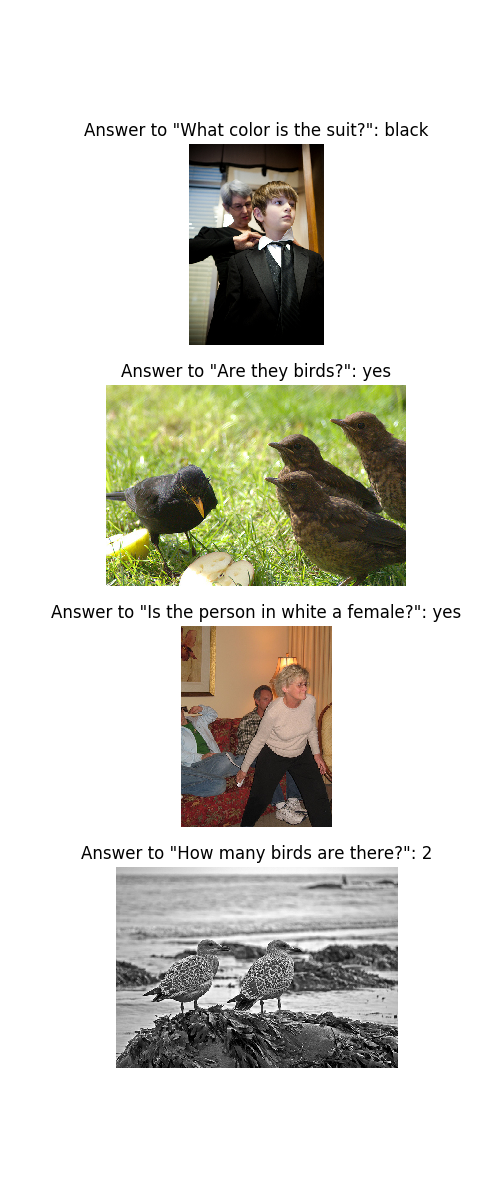

In [119]:
import os, random

filename=['COCO_train2014_000000311667.jpg','COCO_train2014_000000577455.jpg','COCO_train2014_000000196711.jpg','COCO_train2014_000000397294.jpg']
question=['What color is the suit?','Are they birds?','Is the person in white a female?','How many birds are there?']
fig, axes = plt.subplots(nrows=len(question), figsize=(5, len(question)*3))
for f, qs, a in zip(filename, question, axes):
    path = os.path.join(train_image_path, f)
    image = Image.open(path).convert('RGB')
    img = transform(image).cuda()
    q, q_len=encode_question(qs.lower()[:-1].split(' '))
    q = q.view(1,23).cuda()
    q_len= torch.Tensor([q_len]).cuda()
    with torch.no_grad():
        y = resnet(img.view(1,3,448,448))
    y=y.cuda()
    out=net((y,q,q_len))
    _,ans=out.max(dim=1, keepdim=True)
    a.imshow(image)
    a.axis('off')
    a.set_title('Answer to \"'+qs+ '\": ' + str(index_to_answer[str(ans.item())]))